In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [129]:
import numpy as np
import pandas as pd

#load the consolidated dataset
df = pd.read_csv(r'C:\Users\alexm\FX_project\2000_2024\data2.csv')

df['Close_Mid'].head()

C:\Users\alexm\AppData\Local\Temp\ipykernel_22968\215006533.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\alexm\FX_project\2000_2024\data2.csv')


0    1.60602
1    1.61358
2    1.59606
3    1.60141
4    1.60385
Name: Close_Mid, dtype: float64

In [130]:
# remove extra rows and columns
df = df.iloc[200:5383, 0:62]
df.head()

,Date,Day,Month,Year,Close_Mid,Volume_Bid,Volume_Ask,Volume_Tot,Close_Sprd,5D-MA,...,UK-NomGDP,UK-CPI,UK-Unemp,UK-CorpProf,UK-HshldInc,UK-ResPropInc,UK-SecLend,UK-ConsCred,UK-RetailVol,UK-MktVol
200,08/02/2004,8.0,2.0,2004.0,1.86077,193566.4553,168027.0151,361593.4704,0.0001,1.842514,...,323214.0,75.9,4.8,152273.0,228137.0,48.6,15.3,13.9,8.1,16.6
201,09/02/2004,9.0,2.0,2004.0,1.86755,185836.2850,161543.9481,347380.2331,0.0001,1.848244,...,323214.0,75.9,4.8,152273.0,228137.0,48.6,15.3,13.9,8.1,16.6
202,10/02/2004,10.0,2.0,2004.0,1.89076,184724.7819,162177.2662,346902.0481,0.0002,1.860112,...,323214.0,75.9,4.8,152273.0,228137.0,48.6,15.3,13.9,8.1,16.6
203,11/02/2004,11.0,2.0,2004.0,1.89239,192611.3716,165750.1633,358361.5349,0.0001,1.871732,...,323214.0,75.9,4.8,152273.0,228137.0,48.6,15.3,13.9,8.1,16.6
204,12/02/2004,12.0,2.0,2004.0,1.88505,186042.9791,161135.5285,347178.5076,0.0001,1.879304,...,323214.0,75.9,4.8,152273.0,228137.0,48.6,15.3,13.9,8.1,16.6


In [131]:
# reformat Local time variable as a datetime
from datetime import datetime

df['Date'] = df['Date'].str[6:10] +'-'+ df['Date'].str[3:5] +'-'+ df['Date'].str[0:2]
df['Date'] = pd.to_datetime(df['Date'])

df.tail()

,Date,Day,Month,Year,Close_Mid,Volume_Bid,Volume_Ask,Volume_Tot,Close_Sprd,5D-MA,...,UK-NomGDP,UK-CPI,UK-Unemp,UK-CorpProf,UK-HshldInc,UK-ResPropInc,UK-SecLend,UK-ConsCred,UK-RetailVol,UK-MktVol
5378,2023-12-24,24.0,12.0,2023.0,1.269530,2413.7100,2350.6500,4764.3600,0.00250,1.269076,...,683910.0,136.4,4.7,319443.0,464173.0,108.0,3.2,10.5,0.9,23.0
5379,2023-12-25,25.0,12.0,2023.0,1.272510,116117.6790,179570.6997,295688.3787,0.00022,1.268933,...,683910.0,136.4,4.7,319443.0,464173.0,108.0,3.2,10.5,0.9,23.0
5380,2023-12-26,26.0,12.0,2023.0,1.279820,84425.9902,100548.2205,184974.2107,0.00022,1.272123,...,683910.0,136.4,4.7,319443.0,464173.0,108.0,3.2,10.5,0.9,23.0
5381,2023-12-27,27.0,12.0,2023.0,1.273285,122858.9903,117712.1608,240571.1511,0.00029,1.272988,...,683910.0,136.4,4.7,319443.0,464173.0,108.0,3.2,10.5,0.9,23.0
5382,2023-12-28,28.0,12.0,2023.0,1.273155,147171.7480,158575.6587,305747.4067,0.00047,1.273660,...,683910.0,136.4,4.7,319443.0,464173.0,108.0,3.2,10.5,0.9,23.0


[Text(0.5, 0, 'UK-Consumer Credit'), Text(0, 0.5, 'Date')]

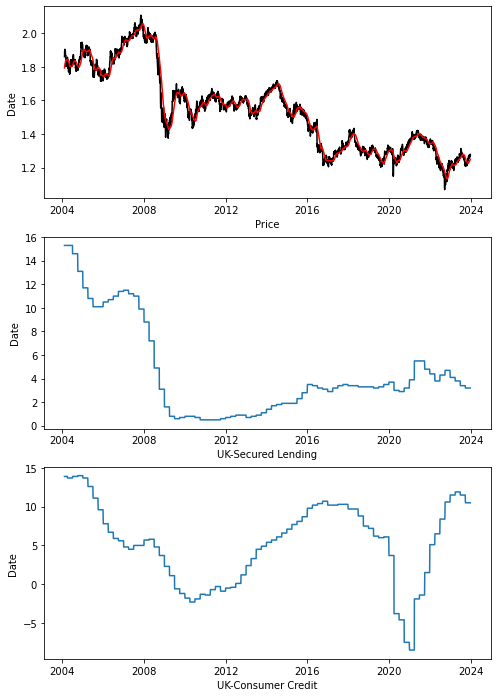

In [132]:
# visual selection
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

fig, ax = plt.subplots(3, figsize=(8, 12))

ax[0].plot(df['Date'],df['Close_Mid'], color='black')
ax[0].plot(df['Date'],df['50D-MA'], color='red')
ax[0].set(xlabel="Price", ylabel="Date")

ax[1].plot(df['Date'],df['UK-SecLend'])
ax[1].set(xlabel="UK-Secured Lending", ylabel="Date")

ax[2].plot(df['Date'],df['UK-ConsCred'])
ax[2].set(xlabel="UK-Consumer Credit", ylabel="Date")

[Text(0.5, 0, 'UK-MktVol'), Text(0, 0.5, 'Date')]

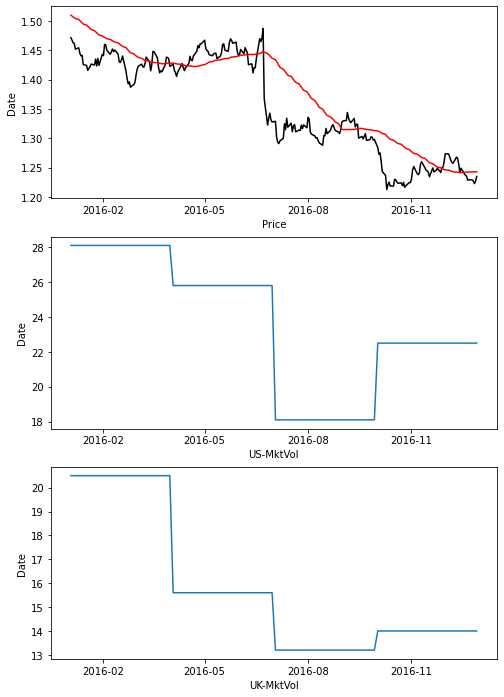

In [133]:
# filter on a year
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df_year = df[df['Year'] == 2016]

fig, ax = plt.subplots(3, figsize=(8, 12))
ax_fmt = mdates.MonthLocator(interval=3)

for i in range(len(ax)):
    ax[i-1].xaxis.set_major_locator(ax_fmt)
    ax[i-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[0].plot(df_year['Date'],df_year['Close_Mid'], color='black')
ax[0].plot(df_year['Date'],df_year['50D-MA'], color='red')
ax[0].set(xlabel="Price", ylabel="Date")

ax[1].plot(df_year['Date'],df_year['US-MktVol'])
ax[1].set(xlabel="US-MktVol", ylabel="Date")

ax[2].plot(df_year['Date'],df_year['UK-MktVol'])
ax[2].set(xlabel="UK-MktVol", ylabel="Date")

In [156]:
# normalise data

df_norm = df.iloc[:, 4:]
df_dates = df.iloc[:, :4]

for col in df_norm.columns:
    df_norm[col] = (df_norm[col] - df_norm[col].mean())/ df_norm[col].std()
    
#df_norm2 = pd.concat([df_dates,df_norm], axix=1)
x = df_norm.to_numpy()
y = df_dates.to_numpy()
cols = df.columns
z = np.append(y,x, axis=1)

df_norm2 = pd.DataFrame(z, columns=cols)
df_norm2.head()

,Date,Day,Month,Year,Close_Mid,Volume_Bid,Volume_Ask,Volume_Tot,Close_Sprd,5D-MA,...,UK-NomGDP,UK-CPI,UK-Unemp,UK-CorpProf,UK-HshldInc,UK-ResPropInc,UK-SecLend,UK-ConsCred,UK-RetailVol,UK-MktVol
0,2004-02-08,8.0,2.0,2004.0,1.346261,-0.108425,-0.163825,-0.136559,-0.990425,1.269796,...,-1.594999,-1.521179,-0.510423,-1.612364,-1.684136,-1.475755,2.743055,1.654251,1.138495,-0.375961
1,2004-02-09,9.0,2.0,2004.0,1.374563,-0.128922,-0.180773,-0.155302,-0.990425,1.293727,...,-1.594999,-1.521179,-0.510423,-1.612364,-1.684136,-1.475755,2.743055,1.654251,1.138495,-0.375961
2,2004-02-10,10.0,2.0,2004.0,1.471449,-0.131869,-0.179118,-0.155932,-0.684685,1.343293,...,-1.594999,-1.521179,-0.510423,-1.612364,-1.684136,-1.475755,2.743055,1.654251,1.138495,-0.375961
3,2004-02-11,11.0,2.0,2004.0,1.478254,-0.110957,-0.169778,-0.140821,-0.990425,1.391824,...,-1.594999,-1.521179,-0.510423,-1.612364,-1.684136,-1.475755,2.743055,1.654251,1.138495,-0.375961
4,2004-02-12,12.0,2.0,2004.0,1.447614,-0.128374,-0.181841,-0.155568,-0.990425,1.423448,...,-1.594999,-1.521179,-0.510423,-1.612364,-1.684136,-1.475755,2.743055,1.654251,1.138495,-0.375961


In [181]:
df_norm2[cols[1:]] = df_norm2[cols[1:]].astype(float)
df_norm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183 entries, 0 to 5182
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5183 non-null   datetime64[ns]
 1   Day              5183 non-null   float64       
 2   Month            5183 non-null   float64       
 3   Year             5183 non-null   float64       
 4   Close_Mid        5183 non-null   float64       
 5   Volume_Bid       5183 non-null   float64       
 6   Volume_Ask       5183 non-null   float64       
 7   Volume_Tot       5183 non-null   float64       
 8   Close_Sprd       5183 non-null   float64       
 9   5D-MA            5183 non-null   float64       
 10  10D-MA           5183 non-null   float64       
 11  20D-MA           5183 non-null   float64       
 12  50D-MA           5183 non-null   float64       
 13  200D-MA          5183 non-null   float64       
 14  5D-Vol           5183 non-null   float64

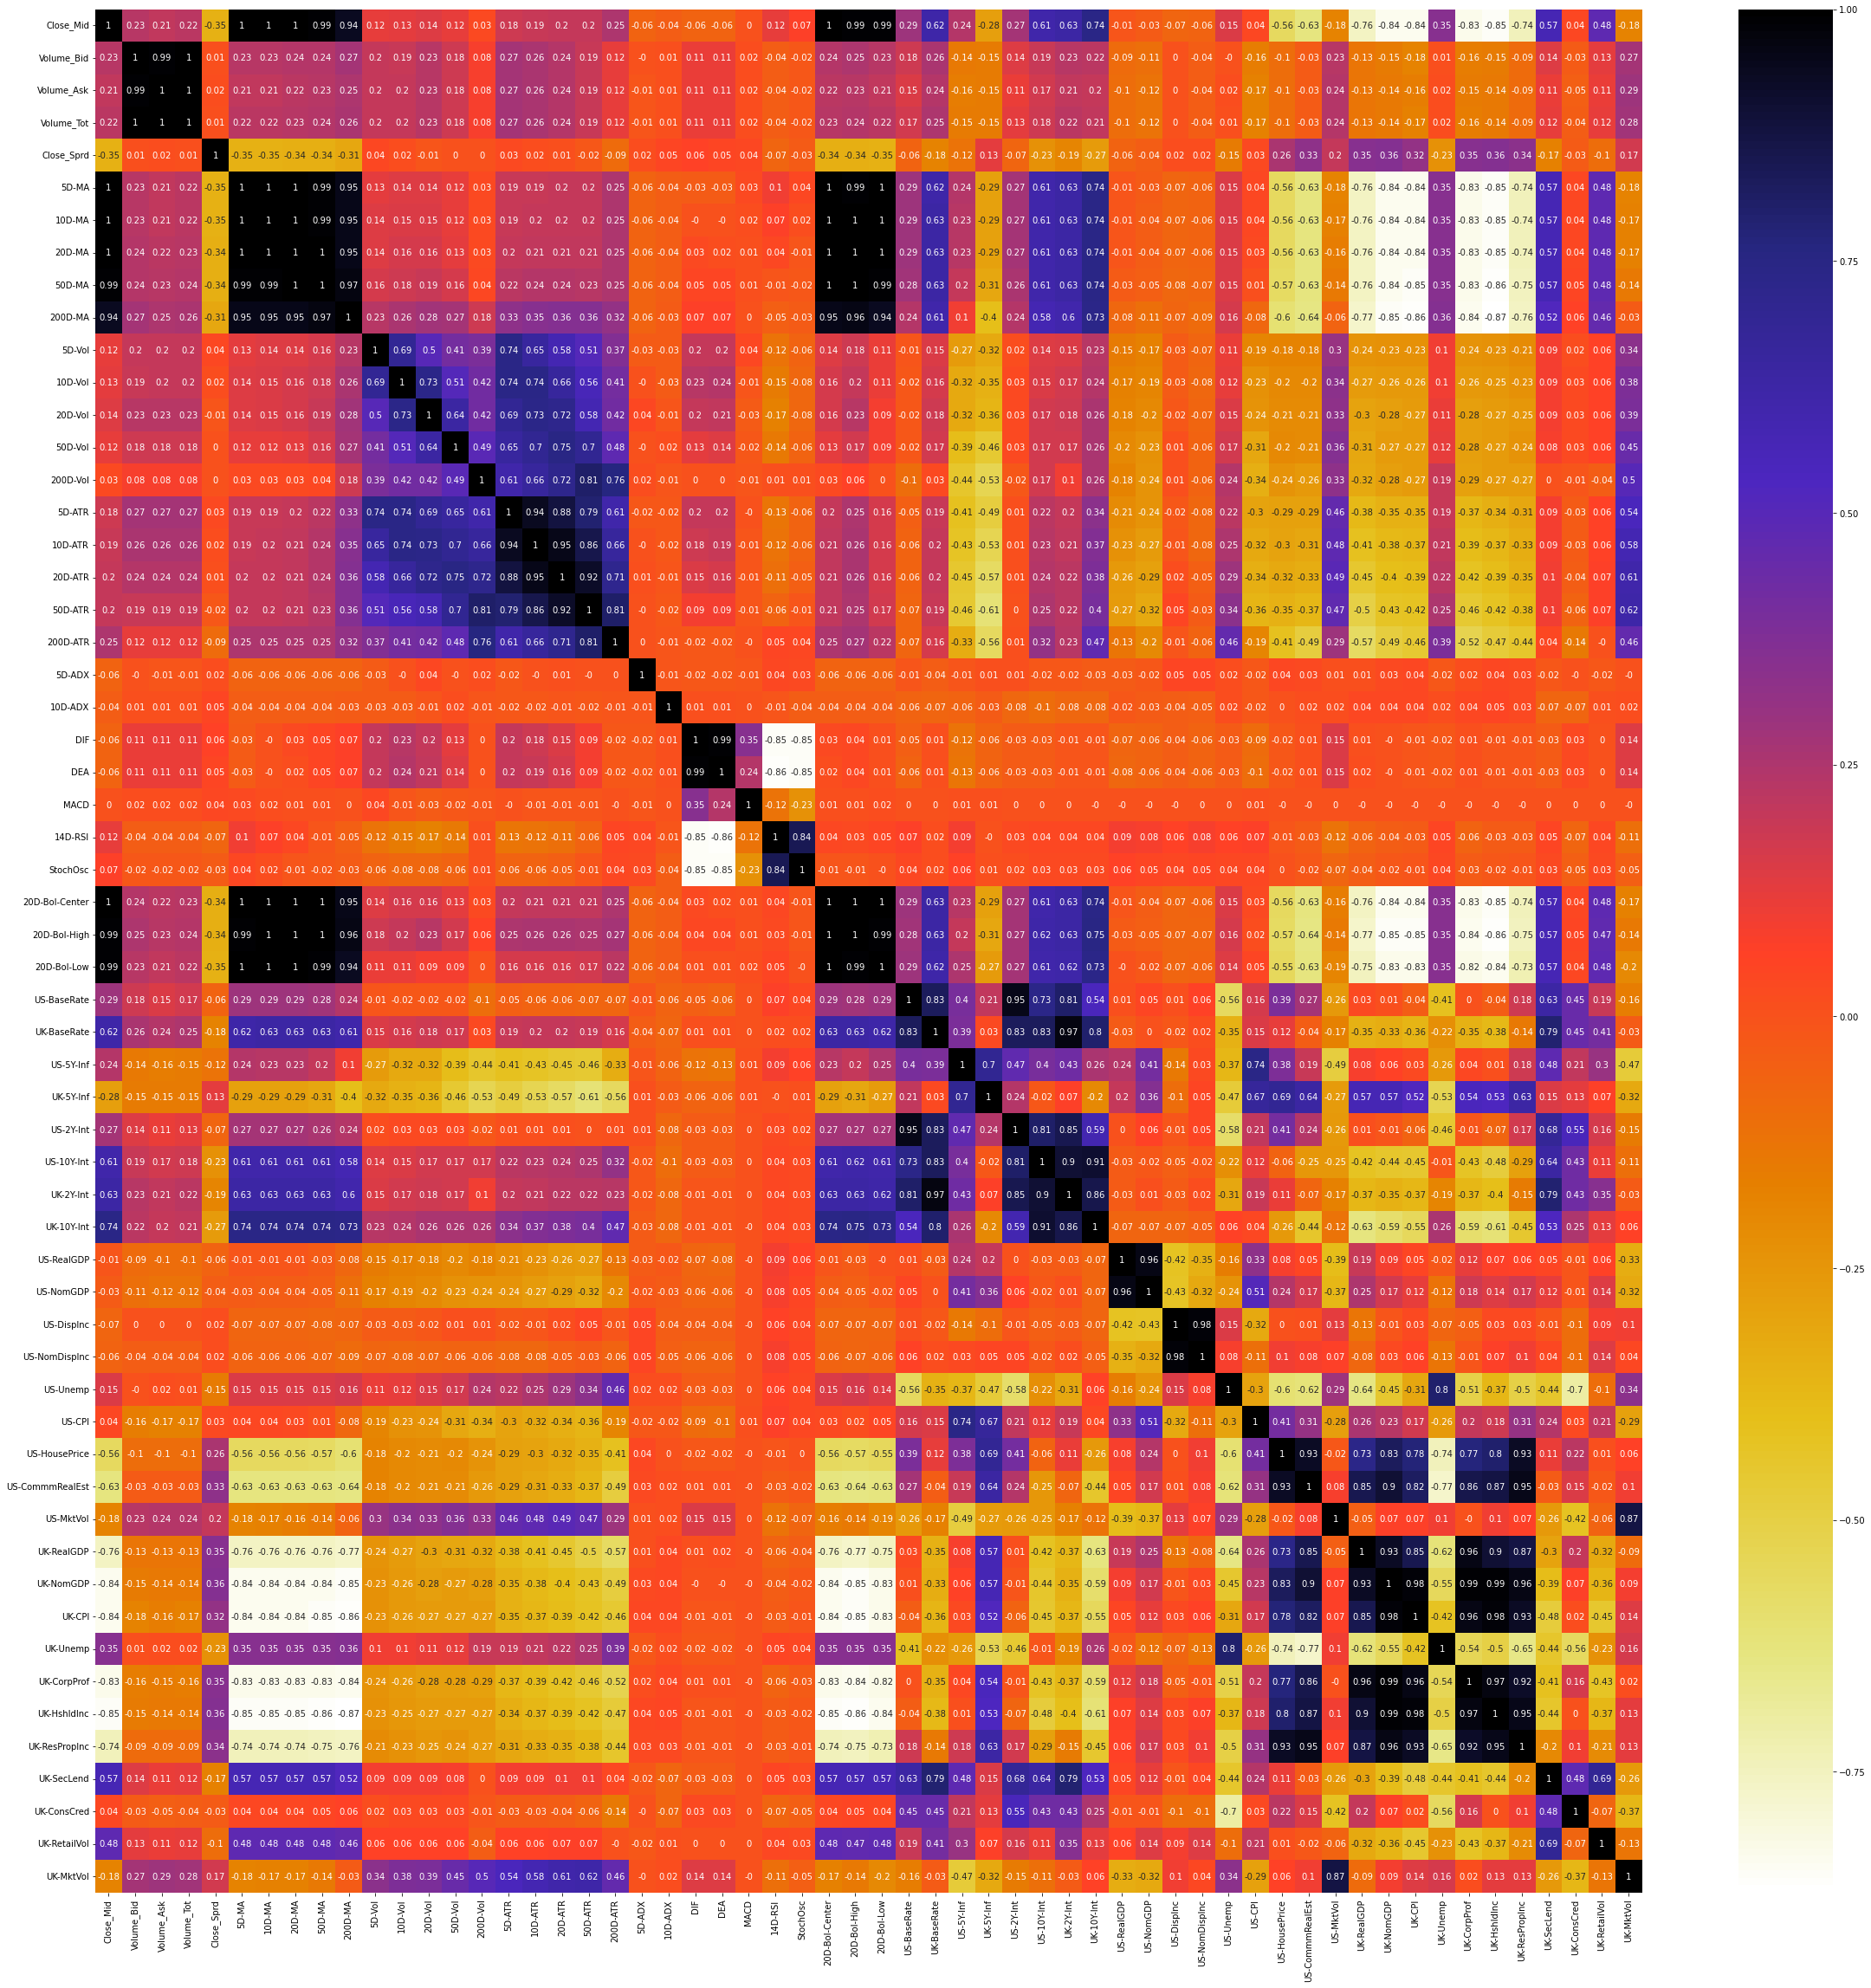

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_norm2.iloc[:, 4:]

corrmat_trans = data.corr() # note that this will only calculate for numeric data
corr_features_trans = corrmat_trans.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[corr_features_trans].corr().round(2),annot=True , cmap=plt.cm.CMRmap_r)
plt.show()



In [350]:
data[corr_features_trans].corr().to_csv('correlations.csv', index=True)

In [256]:
# now we can see if any of the varibles correlate with a lag to the dependent variable (close_mid)
dependent = data.iloc[:, 0:1].to_numpy()
features = data.iloc[:, 1:].to_numpy()

cols = data.iloc[:, 1:].columns
lag_corr = pd.DataFrame(columns=cols)
lag_corr['Index'] = range(252)

feat_col = 0

for i in range(252):
    lag_corr.iloc[i,feat_col] = np.corrcoef(dependent[0+i:4931+i,0:1].transpose(), features[0:4931,0:1].transpose())[0,1]
    

In [257]:
lag_corr

,Volume_Bid,Volume_Ask,Volume_Tot,Close_Sprd,5D-MA,10D-MA,20D-MA,50D-MA,200D-MA,5D-Vol,...,UK-CPI,UK-Unemp,UK-CorpProf,UK-HshldInc,UK-ResPropInc,UK-SecLend,UK-ConsCred,UK-RetailVol,UK-MktVol,Index
0,0.221061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.219908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.21922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,0.218425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,0.217252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.151818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247
248,0.150338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248
249,0.148479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249
250,0.146565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250


In [261]:
# now we can see if any of the varibles correlate with a lag to the dependent variable (close_mid)
dependent = data.iloc[:, 0:1].to_numpy()
features = data.iloc[:, 1:].to_numpy()

cols = data.iloc[:, 1:].columns
lag_corr = pd.DataFrame(columns=cols)
lag_corr['Index'] = range(252)

for j in range(57):
    for i in range(252):
        lag_corr.iloc[i,j] = np.corrcoef(dependent[0+i:4931+i,0:1].transpose(), features[0:4931,j:j+1].transpose())[0,1]


In [277]:

df_lagCorr = pd.DataFrame(lag_corr, columns= data.iloc[:, 1:].columns.insert(57,'Index'))

In [278]:
df_lagCorr


,Volume_Bid,Volume_Ask,Volume_Tot,Close_Sprd,5D-MA,10D-MA,20D-MA,50D-MA,200D-MA,5D-Vol,...,UK-CPI,UK-Unemp,UK-CorpProf,UK-HshldInc,UK-ResPropInc,UK-SecLend,UK-ConsCred,UK-RetailVol,UK-MktVol,Index
0,0.221061,0.203695,0.212681,-0.354836,0.999066,0.997818,0.995466,0.988182,0.940855,0.104209,...,-0.859873,0.314835,-0.826052,-0.85302,-0.730324,0.58537,0.121578,0.424824,-0.151774,0
1,0.219908,0.202435,0.211472,-0.355848,0.998288,0.997064,0.994737,0.987454,0.940027,0.102395,...,-0.859879,0.315149,-0.826245,-0.853043,-0.730348,0.585589,0.121062,0.4248,-0.153242,1
2,0.21922,0.201603,0.210711,-0.356026,0.997517,0.996317,0.994009,0.986727,0.939204,0.100915,...,-0.859885,0.315442,-0.826452,-0.853067,-0.73036,0.585786,0.120529,0.424811,-0.154643,2
3,0.218425,0.200702,0.209861,-0.355077,0.996763,0.99559,0.993286,0.986007,0.9384,0.099305,...,-0.859877,0.315757,-0.826642,-0.853075,-0.730365,0.585945,0.119973,0.424803,-0.15596,3
4,0.217252,0.199444,0.208643,-0.354799,0.99602,0.994877,0.992563,0.985285,0.937595,0.09795,...,-0.859841,0.316057,-0.826792,-0.853064,-0.730344,0.586111,0.119456,0.424775,-0.157274,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.151818,0.128398,0.140265,-0.379029,0.811252,0.810591,0.809288,0.805552,0.785337,0.138143,...,-0.848034,0.369312,-0.859833,-0.871373,-0.768415,0.56236,0.080155,0.359833,-0.143255,247
248,0.150338,0.12693,0.138788,-0.378629,0.810766,0.810109,0.808823,0.805108,0.78491,0.13776,...,-0.847871,0.369318,-0.859709,-0.871373,-0.768479,0.56205,0.080372,0.359552,-0.143687,248
249,0.148479,0.125024,0.136902,-0.379391,0.81028,0.809631,0.808359,0.804664,0.784483,0.137277,...,-0.847712,0.369329,-0.859573,-0.871364,-0.76854,0.561748,0.0806,0.359235,-0.144048,249
250,0.146565,0.123009,0.134934,-0.38021,0.809786,0.809152,0.807892,0.804218,0.784054,0.13699,...,-0.847548,0.369347,-0.859433,-0.871346,-0.768583,0.56145,0.080806,0.358921,-0.144513,250


Text(0.5, 1.0, 'Volume_Bid')

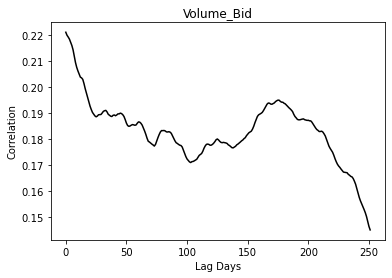

In [352]:
# graph the results
col = 0
plt.plot(df_lagCorr.iloc[:,col:col+1], color='black')
plt.ylabel('Correlation')
plt.xlabel('Lag Days')
plt.title(df_lagCorr.columns[col])

In [351]:
df_lagCorr.to_csv('lagCorrel.csv', index=True)